<h1> Lecture 17  

Data Science 8, Spring 2021 </h1>

<h3>
<b>
<ul>
<li>Mendel's Model of Pea Flowers   </li><br>
            
<li>Comparing Distributions  </li><br>

<li>Hypothesis Testing  </li><br>
</ul>
</b>
</h3>

In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

#The following allows porting images into a Markdown window
from IPython.display import Image

## Mendel and Pea Flowers ##

In [2]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [3]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([0.74273412, 0.25726588])

In [4]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [5]:
purple_flowers()

74.48869752421959

In [6]:
num_simulations=1000

purples = make_array()

for i in np.arange(num_simulations):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

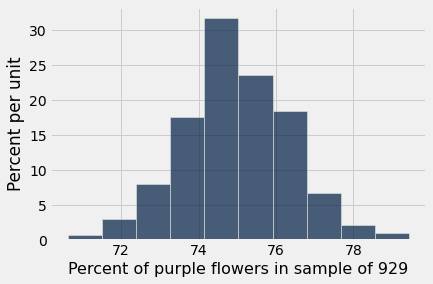

In [7]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

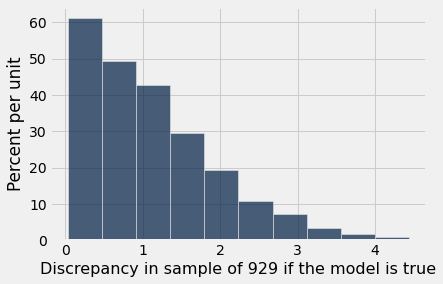

In [8]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

<h3>How close was Mendel's sample to the model's prediction?</h3>

In [9]:
abs(observed_purples * 100 - 75)

1.318622174381062

<h3>Compared to the width of the histograms, this is small.<br>
    
Supports Mendel's model.</h3>

SLIDE: Two Viewpoints: Model and Alternative

<h2> Alameda County Jury Panels </h2>

<h3> In this case, we have more than two categories (relative to Swain v. Alabama)</h3>

<h3> In Alameda county, <br> 
    
<ul>
<li>15% of eligible voters are Asian   </li><br>
<li>18% of eligible voters are Black   </li><br>
<li>12% of eligible voters are Latino   </li><br>
<li>54% of eligible voters are White   </li><br>
<li>1% of eligible voters are 'Other'   </li>
</ul>
</h3>   

<h3> However, <br> 
    
<ul>
<li>26% of jury panels are Asian   </li><br>
<li>8%  of jury panels are Black   </li><br>
<li>8%  of jury panels are Latino   </li><br>
<li>54%  of jury panels are White   </li><br>
<li>4%  of jury panels are 'Other'   </li>
</ul>
</h3>   

In [10]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


<h3> Question: Were these panels randomly selected?</h3>

<h4> Are the discrepancies reasonably justified by chance models?<h4>

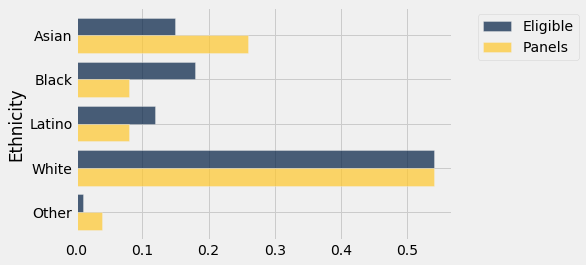

In [3]:
jury.barh('Ethnicity')

In [11]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [12]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated

array([0.16865777, 0.15952214, 0.11806044, 0.54251581, 0.01124385])

<h3>Add this single simulation as a column to the table:</h3>

In [13]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.168658
Black,0.18,0.08,0.159522
Latino,0.12,0.08,0.11806
White,0.54,0.54,0.542516
Other,0.01,0.04,0.0112439


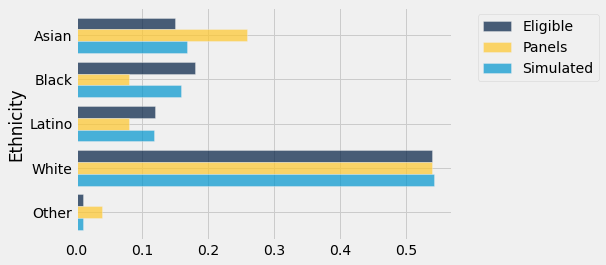

In [14]:
jury_with_simulated.barh('Ethnicity')

<h3> We must run the simulation many times, and compare the simulation histogram/bar chart with the actual composition of the jury panel.<br>
    
For this, we must introduce a new statistic that measures how far the eligible distribution is from the jury-panel distribution.  
</h3>

<h2> Distance Between Distributions </h2>

SLIDE: A New Statistic (Total Variation Distance)

In [17]:
# In the last lecture, the difference between observed blacks on jury or purple flowers
# and their expected values (26%/75%) was our statistic.
#
# In this case, we need to understand how each of the 5 categories
# differs from its expected value according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [19]:
np.sum(jury_with_difference.column('Difference'))

2.7755575615628914e-17

This is zero, for all intents and purposes. 

SLIDE: Total Variation Distance Description

In [21]:
np.sum(abs(jury_with_difference.column('Difference')))/2

0.14

## Total Variation Distance

In [25]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [26]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14

Same value we got previously. 

<h3>Let's do the same comparison with the simulated distribution:</h3>

In [27]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.01412508784258611

Much closer to the eligible distribution!

In [28]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

In [31]:
tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)
tvds

array([0.00973999, 0.01490513, 0.01982431, ..., 0.00549543, 0.00830639,
       0.02922699])

Observed TVD: 0.14


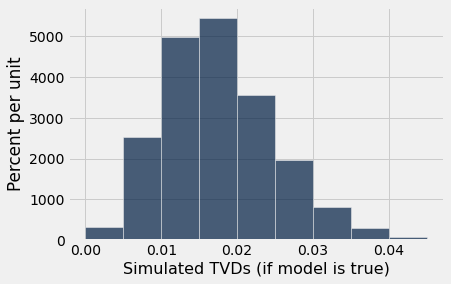

In [30]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))